In [7]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from keras import optimizers

In [2]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [3]:
data, columns = parse_arff('./Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

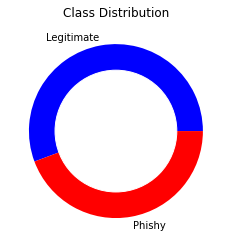

In [4]:
legit = len(df[df['Result'] == '1'])
phishy = len(df[df['Result'] == '-1'])

size=[legit, phishy]
names = ['Legitimate', 'Phishy']
 
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Class Distribution')
plt.show()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.30)

In [21]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [22]:
loss_fn = keras.losses.Huber(delta=1.0)
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

In [20]:
model = keras.Sequential()
model.add(Dense(64, input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=loss_fn, optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 150, validation_data=(x_test, y_test))

Epoch 1/150
242/242 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.8982 - val_loss: 0.0275 - val_accuracy: 0.9319
Epoch 2/150
242/242 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9358 - val_loss: 0.0250 - val_accuracy: 0.9340
Epoch 3/150
242/242 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9368 - val_loss: 0.0246 - val_accuracy: 0.9367
Epoch 4/150
242/242 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9400 - val_loss: 0.0233 - val_accuracy: 0.9397
Epoch 5/150
242/242 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9451 - val_loss: 0.0223 - val_accuracy: 0.9391
Epoch 6/150
242/242 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9491 - val_loss: 0.0226 - val_accuracy: 0.9394
Epoch 7/150
242/242 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9518 - val_loss: 0.0208 - val_accuracy: 0.9439

In [65]:
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)

In [73]:
modelcat = 1 + 1
modelcat = keras.Sequential()
modelcat.add(Dense(64, input_shape = (30,2),  activation='relu'))
modelcat.add(Dense(128, activation='relu'))
modelcat.add(Dense(64,  activation='relu'))
modelcat.add(Dense(1,activation='sigmoid'))

modelcat.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
modelcathistory = modelcat.fit(x_train_cat, y_train, epochs = 150, validation_data=(x_test_cat, y_test))

Epoch 1/150
242/242 [==============================] - 2s 7ms/step - loss: 0.6871 - accuracy: 0.5580 - val_loss: 0.6872 - val_accuracy: 0.5535
Epoch 2/150
242/242 [==============================] - 2s 9ms/step - loss: 0.6863 - accuracy: 0.5584 - val_loss: 0.6872 - val_accuracy: 0.5535
Epoch 3/150
242/242 [==============================] - 2s 7ms/step - loss: 0.6863 - accuracy: 0.5584 - val_loss: 0.6872 - val_accuracy: 0.5535
Epoch 4/150
242/242 [==============================] - 1s 6ms/step - loss: 0.6863 - accuracy: 0.5584 - val_loss: 0.6872 - val_accuracy: 0.5535
Epoch 5/150
242/242 [==============================] - 2s 7ms/step - loss: 0.6863 - accuracy: 0.5584 - val_loss: 0.6873 - val_accuracy: 0.5535
Epoch 6/150
242/242 [==============================] - 2s 7ms/step - loss: 0.6863 - accuracy: 0.5584 - val_loss: 0.6873 - val_accuracy: 0.5535
Epoch 7/150
242/242 [==============================] - 1s 5ms/step - loss: 0.6862 - accuracy: 0.5584 - val_loss: 0.6874 - val_accuracy: 0.5535

In [15]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

model1 = keras.Sequential()
model1.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model1.add(keras.layers.LSTM(128, activation='relu'))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(64 ,activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(1,activation='tanh'))

model1.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model1history = model1.fit(x, y_train, epochs = 150, validation_data=(xx, y_test))

Epoch 1/150
242/242 [==============================] - 3s 13ms/step - loss: 0.5068 - accuracy: 0.7782 - val_loss: 0.2292 - val_accuracy: 0.9210
Epoch 2/150
242/242 [==============================] - 2s 7ms/step - loss: 0.1990 - accuracy: 0.9238 - val_loss: 0.1851 - val_accuracy: 0.9292
Epoch 3/150
242/242 [==============================] - 2s 7ms/step - loss: 0.1780 - accuracy: 0.9284 - val_loss: 0.1707 - val_accuracy: 0.9313
Epoch 4/150
242/242 [==============================] - 2s 8ms/step - loss: 0.1715 - accuracy: 0.9324 - val_loss: 0.1622 - val_accuracy: 0.9331
Epoch 5/150
242/242 [==============================] - 2s 8ms/step - loss: 0.1598 - accuracy: 0.9347 - val_loss: 0.1571 - val_accuracy: 0.9358
Epoch 6/150
242/242 [==============================] - 2s 7ms/step - loss: 0.1519 - accuracy: 0.9368 - val_loss: 0.1576 - val_accuracy: 0.9367
Epoch 7/150
242/242 [==============================] - 2s 8ms/step - loss: 0.1462 - accuracy: 0.9376 - val_loss: 0.1464 - val_accuracy: 0.941

In [16]:
x = x_train.reshape((x_train.shape[0], 2, 5, 3))
xt = x_test.reshape((x_test.shape[0], 2, 5, 3))

model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model2.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128,activation='relu'))
model2.add(keras.layers.Dense(128,activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(1,activation='tanh'))

model2.compile(loss=loss_fn, optimizer='adamax', metrics=['accuracy'])
model2history = model2.fit(x, y_train, epochs = 150, validation_data=(xt, y_test))

Epoch 1/150
242/242 [==============================] - 2s 10ms/step - loss: 0.0865 - accuracy: 0.7494 - val_loss: 0.0658 - val_accuracy: 0.8119
Epoch 2/150
242/242 [==============================] - 2s 7ms/step - loss: 0.0660 - accuracy: 0.8135 - val_loss: 0.0617 - val_accuracy: 0.8188
Epoch 3/150
242/242 [==============================] - 2s 8ms/step - loss: 0.0616 - accuracy: 0.8266 - val_loss: 0.0590 - val_accuracy: 0.8300
Epoch 4/150
242/242 [==============================] - 2s 6ms/step - loss: 0.0580 - accuracy: 0.8419 - val_loss: 0.0551 - val_accuracy: 0.8478
Epoch 5/150
242/242 [==============================] - 2s 7ms/step - loss: 0.0564 - accuracy: 0.8439 - val_loss: 0.0534 - val_accuracy: 0.8499
Epoch 6/150
242/242 [==============================] - 2s 7ms/step - loss: 0.0547 - accuracy: 0.8456 - val_loss: 0.0528 - val_accuracy: 0.8505
Epoch 7/150
242/242 [==============================] - 2s 6ms/step - loss: 0.0531 - accuracy: 0.8563 - val_loss: 0.0572 - val_accuracy: 0.840

In [17]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

model3 = keras.Sequential()
model3.add(keras.layers.LSTM(128, activation='relu',return_sequences=True, input_shape=(1,30)))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.LSTM(256, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(250,activation='relu'))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model3history = model3.fit(x, y_train, epochs = 150, validation_data=(xx, y_test))

Epoch 1/150
242/242 [==============================] - 5s 20ms/step - loss: 0.3414 - accuracy: 0.8748 - val_loss: 0.1932 - val_accuracy: 0.9279
Epoch 2/150
242/242 [==============================] - 4s 15ms/step - loss: 0.1932 - accuracy: 0.9247 - val_loss: 0.1768 - val_accuracy: 0.9343
Epoch 3/150
242/242 [==============================] - 4s 15ms/step - loss: 0.1779 - accuracy: 0.9312 - val_loss: 0.1639 - val_accuracy: 0.9379
Epoch 4/150
242/242 [==============================] - 4s 15ms/step - loss: 0.1644 - accuracy: 0.9342 - val_loss: 0.1636 - val_accuracy: 0.9391
Epoch 5/150
242/242 [==============================] - 4s 15ms/step - loss: 0.1567 - accuracy: 0.9391 - val_loss: 0.1504 - val_accuracy: 0.9382
Epoch 6/150
242/242 [==============================] - 4s 16ms/step - loss: 0.1503 - accuracy: 0.9396 - val_loss: 0.1447 - val_accuracy: 0.9412
Epoch 7/150
242/242 [==============================] - 4s 16ms/step - loss: 0.1415 - accuracy: 0.9420 - val_loss: 0.1402 - val_accuracy:

In [18]:
model4 = keras.Sequential()
model4.add(keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(1,30)))
model4.add(keras.layers.Dropout(0.2))
model4.add(keras.layers.SimpleRNN(128, activation='relu', input_shape=(1,30)))
model4.add(keras.layers.Dropout(0.2))
model4.add(keras.layers.Dense(128,activation='relu'))
model4.add(keras.layers.Dense(128,activation='relu'))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model4hist = model4.fit(x, y_train, epochs = 150, validation_data=(xx, y_test))

Epoch 1/150
242/242 [==============================] - 2s 10ms/step - loss: 0.6393 - accuracy: 0.6513 - val_loss: 0.5310 - val_accuracy: 0.8119
Epoch 2/150
242/242 [==============================] - 1s 5ms/step - loss: 0.4442 - accuracy: 0.8246 - val_loss: 0.2985 - val_accuracy: 0.8963
Epoch 3/150
242/242 [==============================] - 1s 6ms/step - loss: 0.3122 - accuracy: 0.8808 - val_loss: 0.2391 - val_accuracy: 0.9147
Epoch 4/150
242/242 [==============================] - 1s 5ms/step - loss: 0.2745 - accuracy: 0.8949 - val_loss: 0.2146 - val_accuracy: 0.9228
Epoch 5/150
242/242 [==============================] - 1s 5ms/step - loss: 0.2494 - accuracy: 0.9062 - val_loss: 0.2019 - val_accuracy: 0.9246
Epoch 6/150
242/242 [==============================] - 1s 5ms/step - loss: 0.2325 - accuracy: 0.9102 - val_loss: 0.1943 - val_accuracy: 0.9292
Epoch 7/150
242/242 [==============================] - 1s 5ms/step - loss: 0.2315 - accuracy: 0.9110 - val_loss: 0.1886 - val_accuracy: 0.929

In [19]:
model5 = keras.Sequential()
model5.add(keras.layers.GRU(64, return_sequences=True, input_shape=(1,30)))
model5.add(keras.layers.Dropout(0.2))
model5.add(keras.layers.SimpleRNN(128, activation='relu', input_shape=(1,30)))
model5.add(keras.layers.Dropout(0.2))
model5.add(keras.layers.Dense(128,activation='relu'))
model5.add(keras.layers.Dense(128,activation='relu'))
model5.add(keras.layers.Dense(1,activation='sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model5history = model5.fit(x, y_train, epochs = 150, validation_data=(xx, y_test))

Epoch 1/150
242/242 [==============================] - 2s 9ms/step - loss: 0.6673 - accuracy: 0.6074 - val_loss: 0.6303 - val_accuracy: 0.7196
Epoch 2/150
242/242 [==============================] - 2s 6ms/step - loss: 0.5680 - accuracy: 0.7658 - val_loss: 0.4475 - val_accuracy: 0.8740
Epoch 3/150
242/242 [==============================] - 1s 5ms/step - loss: 0.3563 - accuracy: 0.8833 - val_loss: 0.2620 - val_accuracy: 0.9156
Epoch 4/150
242/242 [==============================] - 1s 4ms/step - loss: 0.2588 - accuracy: 0.9068 - val_loss: 0.2165 - val_accuracy: 0.9255
Epoch 5/150
242/242 [==============================] - 1s 4ms/step - loss: 0.2261 - accuracy: 0.9169 - val_loss: 0.1997 - val_accuracy: 0.9270
Epoch 6/150
242/242 [==============================] - 1s 4ms/step - loss: 0.2146 - accuracy: 0.9208 - val_loss: 0.1902 - val_accuracy: 0.9322
Epoch 7/150
242/242 [==============================] - 1s 4ms/step - loss: 0.2017 - accuracy: 0.9232 - val_loss: 0.1851 - val_accuracy: 0.9322

In [26]:
model_pred = model.predict(x_test)
model1_pred = model1.predict(xx)
model2_pred = model2.predict(xt)
model3_pred = model3.predict(xx)
model4_pred = model4.predict(xx)
model5_pred = model5.predict(xx)

In [29]:
for i in range(len(y_test)):
    
    if model_pred[i] < 0.5:
        model_pred[i] = 0
    else:
        model_pred[i] = 1
        
    if model1_pred[i] < 0.5:
        model1_pred[i] = 0
    else:
        model1_pred[i] = 1
        
    if model2_pred[i] < 0.5:
        model2_pred[i] = 0
    else:
        model2_pred[i] = 1
        
    if model3_pred[i] < 0.5:
        model3_pred[i] = 0
    else:
        model3_pred[i] = 1
        
    if model4_pred[i] < 0.5:
        model4_pred[i] = 0
    else:
        model4_pred[i] = 1
        
    if model5_pred[i] < 0.5:
        model5_pred[i] = 0
    else:
        model5_pred[i] = 1        

In [31]:
cm_model  = confusion_matrix(y_test, model_pred)
cm_model1 = confusion_matrix(y_test, model1_pred)
cm_model2 = confusion_matrix(y_test, model2_pred)
cm_model3 = confusion_matrix(y_test, model3_pred)
cm_model4 = confusion_matrix(y_test, model4_pred)
cm_model5 = confusion_matrix(y_test, model5_pred)

[[1415   66]
 [  49 1787]]


<AxesSubplot:>

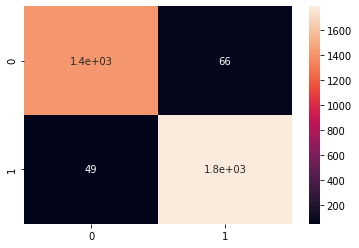

In [39]:
print(cm_model)
sns.heatmap(cm_model, annot=True)

[[1392   89]
 [  44 1792]]


<AxesSubplot:>

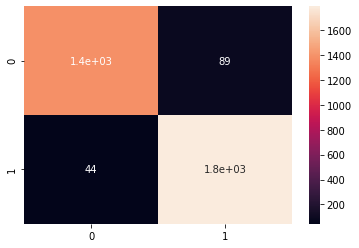

In [40]:
print(cm_model1)
sns.heatmap(cm_model1, annot=True)

[[1312  169]
 [ 143 1693]]


<AxesSubplot:>

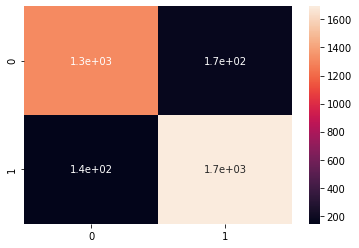

In [41]:
print(cm_model2)
sns.heatmap(cm_model2, annot=True)

[[1439   42]
 [  56 1780]]


<AxesSubplot:>

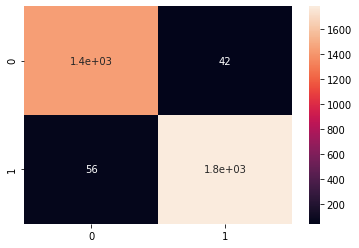

In [42]:
print(cm_model3)
sns.heatmap(cm_model3, annot=True)

[[1424   57]
 [  60 1776]]


<AxesSubplot:>

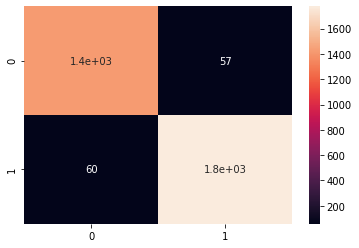

In [43]:
print(cm_model4)
sns.heatmap(cm_model4, annot=True)

[[1402   79]
 [  57 1779]]


<AxesSubplot:>

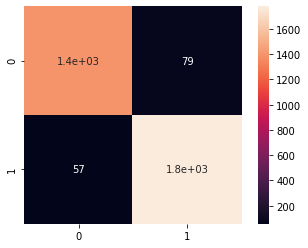

In [38]:
print(cm_model5)
sns.heatmap(cm_model5, annot=True)

In [75]:
modelcat_pred = modelcat.predict(x_test_cat)

In [89]:
modelcat_predd = []
for i in range(len(y_test)):
    if modelcat_pred[i][0] < 0.5:
        modelcat_predd.append(0)
    else:
        modelcat_predd.append(1)

In [92]:
cm_modelcat = confusion_matrix(y_test, modelcat_predd)
print(cm_modelcat)
print("f1 : ", str(f1_score(y_test, modelcat_predd)))
print("precision : ", str(precision_score(y_test, modelcat_predd)))
print("recall : ", str(recall_score(y_test, modelcat_predd)))
print(str(classification_report(y_test, modelcat_predd)))

[[   0 1481]
 [   0 1836]]
f1 :  0.7125946050844169
precision :  0.553512209828158
recall :  1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1481
           1       0.55      1.00      0.71      1836

    accuracy                           0.55      3317
   macro avg       0.28      0.50      0.36      3317
weighted avg       0.31      0.55      0.39      3317



<AxesSubplot:>

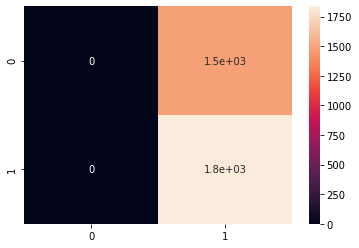

In [93]:
sns.heatmap(cm_modelcat, annot=True)

In [38]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score #precision_recall_fscore_support(y_test, model5_pred)
from sklearn.metrics import classification_report

In [60]:
print("f1 : ", str(f1_score(y_test, model_pred)))
print("precision : ", str(precision_score(y_test, model_pred)))
print("recall : ", str(recall_score(y_test, model_pred)))
print(str(classification_report(y_test, model_pred)))

f1 :  0.9688262401734887
precision :  0.9643820831084727
recall :  0.9733115468409586
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1481
           1       0.96      0.97      0.97      1836

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.96      3317
weighted avg       0.97      0.97      0.97      3317



In [59]:
print("f1 : ", str(f1_score(y_test, model1_pred)))
print("precision : ", str(precision_score(y_test, model1_pred)))
print("recall : ", str(recall_score(y_test, model1_pred)))
print(str(classification_report(y_test, model1_pred)))

f1 :  0.9642184557438794
precision :  0.9526847421584264
recall :  0.9760348583877996
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1481
           1       0.95      0.98      0.96      1836

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [61]:
print("f1 : ", str(f1_score(y_test, model2_pred)))
print("precision : ", str(precision_score(y_test, model2_pred)))
print("recall : ", str(recall_score(y_test, model2_pred)))
print(str(classification_report(y_test, model2_pred)))

f1 :  0.9156300703082748
precision :  0.9092373791621912
recall :  0.9221132897603486
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1481
           1       0.91      0.92      0.92      1836

    accuracy                           0.91      3317
   macro avg       0.91      0.90      0.90      3317
weighted avg       0.91      0.91      0.91      3317



In [62]:
print("f1 : ", str(f1_score(y_test, model3_pred)))
print("precision : ", str(precision_score(y_test, model3_pred)))
print("recall : ", str(recall_score(y_test, model3_pred)))
print(str(classification_report(y_test, model3_pred)))

f1 :  0.9732094040459268
precision :  0.9769484083424808
recall :  0.9694989106753813
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1481
           1       0.98      0.97      0.97      1836

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [63]:
print("f1 : ", str(f1_score(y_test, model4_pred)))
print("precision : ", str(precision_score(y_test, model4_pred)))
print("recall : ", str(recall_score(y_test, model4_pred)))
print(str(classification_report(y_test, model4_pred)))

f1 :  0.9681112019623876
precision :  0.9689034369885434
recall :  0.9673202614379085
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1481
           1       0.97      0.97      0.97      1836

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [64]:
print("f1 : ", str(f1_score(y_test, model5_pred)))
print("precision : ", str(precision_score(y_test, model5_pred)))
print("recall : ", str(recall_score(y_test, model5_pred)))
print(str(classification_report(y_test, model5_pred)))

f1 :  0.9631835408770979
precision :  0.957481162540366
recall :  0.9689542483660131
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1481
           1       0.96      0.97      0.96      1836

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [95]:
x = x_train.reshape((x_train.shape[0], 2, 5, 3))
xt = x_test.reshape((x_test.shape[0], 2, 5, 3))

model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model2.add(keras.layers.MaxPool2D(2,2))
model2.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model2.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128,activation='relu'))
model2.add(keras.layers.Dense(1,activation='tanh'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2history = model2.fit(x, y_train, epochs = 150, validation_data=(xt, y_test))

Epoch 1/150
242/242 [==============================] - 1s 4ms/step - loss: 0.5096 - accuracy: 0.7568 - val_loss: 0.4171 - val_accuracy: 0.8119
Epoch 2/150
242/242 [==============================] - 1s 4ms/step - loss: 0.4500 - accuracy: 0.8072 - val_loss: 0.4431 - val_accuracy: 0.8200
Epoch 3/150
242/242 [==============================] - 1s 6ms/step - loss: 0.4153 - accuracy: 0.8237 - val_loss: 0.4351 - val_accuracy: 0.8354
Epoch 4/150
242/242 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8254 - val_loss: 0.3743 - val_accuracy: 0.8254
Epoch 5/150
242/242 [==============================] - 1s 4ms/step - loss: 0.3830 - accuracy: 0.8356 - val_loss: 0.3549 - val_accuracy: 0.8429
Epoch 6/150
242/242 [==============================] - 1s 4ms/step - loss: 0.4803 - accuracy: 0.7678 - val_loss: 0.3941 - val_accuracy: 0.8092
Epoch 7/150
242/242 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8235 - val_loss: 0.3571 - val_accuracy: 0.8324

In [96]:
modelcnv2_pred = model2.predict(xt)
for i in range(len(y_test)):
    if modelcnv2_pred[i] < 0.5:
        modelcnv2_pred[i] = 0
    else:
        modelcnv2_pred[i] = 1

In [97]:
cm_modelcnv2 = confusion_matrix(y_test, modelcnv2_pred)
print(cm_modelcnv2)
print("f1 : ", str(f1_score(y_test, modelcnv2_pred)))
print("precision : ", str(precision_score(y_test, modelcnv2_pred)))
print("recall : ", str(recall_score(y_test, modelcnv2_pred)))
print(str(classification_report(y_test, modelcnv2_pred)))

[[1313  168]
 [ 176 1660]]
f1 :  0.9061135371179039
precision :  0.9080962800875274
recall :  0.9041394335511983
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1481
           1       0.91      0.90      0.91      1836

    accuracy                           0.90      3317
   macro avg       0.89      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



<AxesSubplot:>

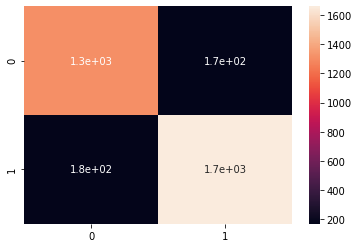

In [98]:
sns.heatmap(cm_modelcnv2, annot=True)

In [100]:
from sklearn.svm import SVC
#svm "kernel: polynomial, C: 5, degree: 6, gamma: scale, DFS: ovo   98.10%
svc = SVC(C=5, kernel='poly', degree=6, gamma='scale', decision_function_shape='ovo').fit(x_train, y_train)
svc_pred = svc.predict(x_test)

In [101]:
from sklearn.svm import LinearSVC
#linear svm "losses: hinge, penalty: L2, C: 1, multi class: ovr" and this combination has an accuracy of 93.19%
lsvc = LinearSVC(penalty='l2', loss='hinge', C=1.0, multi_class='ovr').fit(x_train, y_train)
lsvc_pred = lsvc.predict(x_test)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [102]:
from sklearn.neighbors import KNeighborsClassifier
#K: 5, weights: distance, algorithm: auto, metric: manhattan" and this combination has an accuracy of 98.52%   0.3 test
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', metric='manhattan').fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [103]:
from sklearn.tree import DecisionTreeClassifier
# max features: none, criterion: entropy, splitter: random" and this  combination has an accuracy of 96.92%   .15 test   dtree
dtree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_features=None).fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

In [104]:
from sklearn.naive_bayes import GaussianNB
# 20%. We got 60.89%  as the accuracy value  gnaive b
gnb = GaussianNB().fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

In [105]:
from sklearn.naive_bayes import BernoulliNB
#"alpha: 0, binarize: 0, fit prior: true" and this combination has an accuracy of 90.95%. T  0.2 test  bnaiveba
bnb = BernoulliNB(alpha=0, binarize=0, fit_prior=True).fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [106]:
from sklearn.ensemble import RandomForestClassifier
#"max features: auto, criterion: entropy, class weight: none, warm start: false" and this combination has an accuracy of 97.34%.   0.15  randomfo
forest = RandomForestClassifier(criterion='entropy', max_features='auto', warm_start=False, class_weight=None).fit(x_train, y_train)
forest_pred = forest.predict(x_test)

[[1406   75]
 [  40 1796]]
accuracy :  0.965330117576123
f1 :  0.9689776099271649
precision :  0.9599144842330305
recall :  0.9782135076252724
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1481
           1       0.96      0.98      0.97      1836

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.96      3317
weighted avg       0.97      0.97      0.97      3317



<AxesSubplot:>

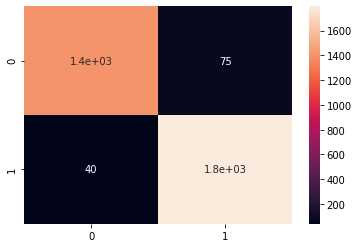

In [108]:
cm_svc = confusion_matrix(y_test, svc_pred)
print(cm_svc)
print("accuracy : ", str(accuracy_score(y_test, svc_pred)))
print("f1 : ", str(f1_score(y_test, svc_pred)))
print("precision : ", str(precision_score(y_test, svc_pred)))
print("recall : ", str(recall_score(y_test, svc_pred)))
print(str(classification_report(y_test, svc_pred)))
sns.heatmap(cm_svc, annot=True)

[[1328  153]
 [  81 1755]]
accuracy :  0.929454326198372
f1 :  0.9375
precision :  0.9198113207547169
recall :  0.9558823529411765
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1481
           1       0.92      0.96      0.94      1836

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



<AxesSubplot:>

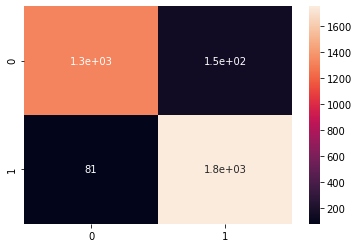

In [109]:
cm_lsvc = confusion_matrix(y_test, lsvc_pred)
print(cm_lsvc)
print("accuracy : ", str(accuracy_score(y_test, lsvc_pred)))
print("f1 : ", str(f1_score(y_test, lsvc_pred)))
print("precision : ", str(precision_score(y_test, lsvc_pred)))
print("recall : ", str(recall_score(y_test, lsvc_pred)))
print(str(classification_report(y_test, lsvc_pred)))
sns.heatmap(cm_lsvc, annot=True)

[[1410   71]
 [  61 1775]]
accuracy :  0.9602050045221586
f1 :  0.964149918522542
precision :  0.9615384615384616
recall :  0.9667755991285403
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1481
           1       0.96      0.97      0.96      1836

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



<AxesSubplot:>

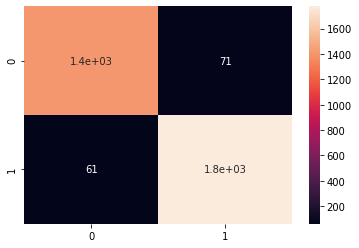

In [110]:
cm_knn = confusion_matrix(y_test, knn_pred)
print(cm_knn)
print("accuracy : ", str(accuracy_score(y_test, knn_pred)))
print("f1 : ", str(f1_score(y_test, knn_pred)))
print("precision : ", str(precision_score(y_test, knn_pred)))
print("recall : ", str(recall_score(y_test, knn_pred)))
print(str(classification_report(y_test, knn_pred)))
sns.heatmap(cm_knn, annot=True)

[[1408   73]
 [  54 1782]]
accuracy :  0.9617123907145011
f1 :  0.9655919804930914
precision :  0.9606469002695418
recall :  0.9705882352941176
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1481
           1       0.96      0.97      0.97      1836

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



<AxesSubplot:>

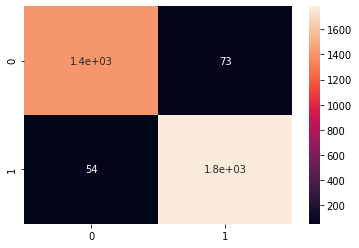

In [111]:
cm_dtree = confusion_matrix(y_test, dtree_pred)
print(cm_dtree)
print("accuracy : ", str(accuracy_score(y_test, dtree_pred)))
print("f1 : ", str(f1_score(y_test, dtree_pred)))
print("precision : ", str(precision_score(y_test, dtree_pred)))
print("recall : ", str(recall_score(y_test, dtree_pred)))
print(str(classification_report(y_test, dtree_pred)))
sns.heatmap(cm_dtree, annot=True)

[[1479    2]
 [1295  541]]
accuracy :  0.6089840217063611
f1 :  0.4548129466162253
precision :  0.996316758747698
recall :  0.2946623093681917
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      1481
           1       1.00      0.29      0.45      1836

    accuracy                           0.61      3317
   macro avg       0.76      0.65      0.57      3317
weighted avg       0.79      0.61      0.56      3317



<AxesSubplot:>

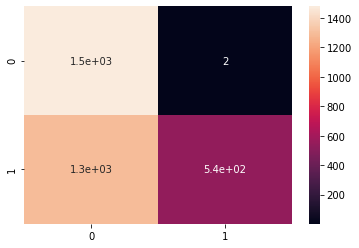

In [112]:
cm_gnb = confusion_matrix(y_test, gnb_pred)
print(cm_gnb)
print("accuracy : ", str(accuracy_score(y_test, gnb_pred)))
print("f1 : ", str(f1_score(y_test, gnb_pred)))
print("precision : ", str(precision_score(y_test, gnb_pred)))
print("recall : ", str(recall_score(y_test, gnb_pred)))
print(str(classification_report(y_test, gnb_pred)))
sns.heatmap(cm_gnb, annot=True)

[[1317  164]
 [ 151 1685]]
accuracy :  0.9050346698824239
f1 :  0.9145183175033921
precision :  0.9113034072471606
recall :  0.9177559912854031
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1481
           1       0.91      0.92      0.91      1836

    accuracy                           0.91      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.91      0.90      3317



<AxesSubplot:>

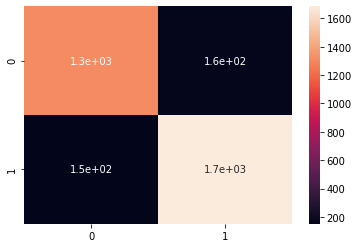

In [113]:
cm_bnb = confusion_matrix(y_test, bnb_pred)
print(cm_bnb)
print("accuracy : ", str(accuracy_score(y_test, bnb_pred)))
print("f1 : ", str(f1_score(y_test, bnb_pred)))
print("precision : ", str(precision_score(y_test, bnb_pred)))
print("recall : ", str(recall_score(y_test, bnb_pred)))
print(str(classification_report(y_test, bnb_pred)))
sns.heatmap(cm_bnb, annot=True)

[[1425   56]
 [  39 1797]]
accuracy :  0.9713596623454929
f1 :  0.9742477636215777
precision :  0.9697787371829466
recall :  0.9787581699346405
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1481
           1       0.97      0.98      0.97      1836

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



<AxesSubplot:>

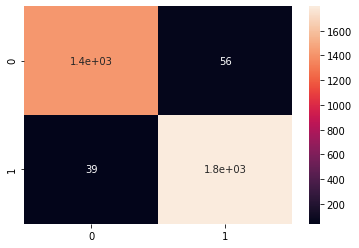

In [114]:
cm_forest = confusion_matrix(y_test, forest_pred)
print(cm_forest)
print("accuracy : ", str(accuracy_score(y_test, forest_pred)))
print("f1 : ", str(f1_score(y_test, forest_pred)))
print("precision : ", str(precision_score(y_test, forest_pred)))
print("recall : ", str(recall_score(y_test, forest_pred)))
print(str(classification_report(y_test, forest_pred)))
sns.heatmap(cm_forest, annot=True)

In [115]:
forestacc = accuracy_score(y_test, forest_pred)
forestf1 = f1_score(y_test, forest_pred)
forestprecision = precision_score(y_test, forest_pred)
forestrecall = recall_score(y_test, forest_pred)

bnbacc = accuracy_score(y_test, bnb_pred)
bnbf1 = f1_score(y_test, bnb_pred)
bnbprecision = precision_score(y_test, bnb_pred)
bnbrecall = recall_score(y_test, bnb_pred)

gnbacc = accuracy_score(y_test, gnb_pred)
gnbf1 = f1_score(y_test, gnb_pred)
gnbprecision = precision_score(y_test, gnb_pred)
gngbrecall = recall_score(y_test, gnb_pred)

dtreeacc = accuracy_score(y_test, dtree_pred)
dtreef1 = f1_score(y_test, dtree_pred)
dtreeprecision = precision_score(y_test, dtree_pred)
dtreerecall = recall_score(y_test, dtree_pred)

knnacc = accuracy_score(y_test, knn_pred)
knnf1 = f1_score(y_test, knn_pred)
knnprecision = precision_score(y_test, knn_pred)
knnrecall = recall_score(y_test, knn_pred)

lsvcacc = accuracy_score(y_test, lsvc_pred)
lsvcf1 = f1_score(y_test, lsvc_pred)
lsvcprecision = precision_score(y_test, lsvc_pred)
lsvcrecall = recall_score(y_test, lsvc_pred)

svcacc = accuracy_score(y_test, svc_pred)
svcf1 = f1_score(y_test, svc_pred)
svcprecision = precision_score(y_test, svc_pred)
svcrecall = recall_score(y_test, svc_pred)

In [119]:
modelcnv2f1 = f1_score(y_test, modelcnv2_pred)
modelcnv2precision = precision_score(y_test, modelcnv2_pred)
modelcnv2recall = recall_score(y_test, modelcnv2_pred)

model5f1 = f1_score(y_test, model5_pred)
model5precision = precision_score(y_test, model5_pred)
model5recall = recall_score(y_test, model5_pred)

model4f1 = f1_score(y_test, model4_pred)
model4precision = precision_score(y_test, model4_pred)
model4recall = recall_score(y_test, model4_pred)

model3f1 = f1_score(y_test, model3_pred)
model3precision = precision_score(y_test, model3_pred)
model3recall = recall_score(y_test, model3_pred)

model2f1 = f1_score(y_test, model2_pred)
model2precision = precision_score(y_test, model2_pred)
model2recall = recall_score(y_test, model2_pred)

model1f1 = f1_score(y_test, model1_pred)
model1precision = precision_score(y_test, model1_pred)
model1recall = recall_score(y_test, model1_pred)

modelf1 = f1_score(y_test, model_pred)
modelprecision = precision_score(y_test, model_pred)
modelrecall = recall_score(y_test, model_pred)

modelcatf1 = f1_score(y_test, modelcat_predd)
modelcatprecision = precision_score(y_test, modelcat_predd)
modelcatrecall = recall_score(y_test, modelcat_predd)

In [121]:
acc = [svcacc, lsvcacc, knnacc, dtreeacc, gnbacc, bnbacc, forestacc, 92.00, 96.21, 96.85, 98.31, 93.19, 98.81, 98.84, 55.84]
f1 = [svcf1, lsvcf1, knnf1, dtreef1, gnbf1, bnbf1, forestf1, modelcnv2f1, model5f1, model4f1, model3f1, model2f1, model1f1, modelf1, modelcatf1]
precision = [svcprecision, lsvcprecision, knnprecision, dtreeprecision, gnbprecision, bnbprecision, forestprecision, modelcnv2precision, model5precision, model4precision, model3precision, model2precision, model1precision, modelprecision, modelcatprecision]
recall = [svcrecall, lsvcrecall, knnrecall, dtreerecall, gngbrecall, bnbrecall, forestrecall, modelcnv2recall, model5recall, model4recall, model3recall, model2recall, model1recall, modelrecall, modelcatrecall]

In [2]:
acc = [0.965330117576123, 0.929454326198372, 0.9602050045221586, 0.9617123907145011, 0.6089840217063611, 0.9050346698824239, 0.9713596623454929, 0.92, 0.9621, 0.9685, 0.9831, 0.9319, 0.9881, 0.9884, 0.5584]

In [3]:
f1 = [0.9689776099271649, 0.9375, 0.964149918522542, 0.9655919804930914, 0.4548129466162253, 0.9145183175033921, 0.9742477636215777, 0.9061135371179039, 0.9631835408770979, 0.9681112019623876, 0.9732094040459268, 0.9156300703082748, 0.9642184557438794, 0.9688262401734887, 0.7125946050844169]

In [4]:
precision = [0.9599144842330305, 0.9198113207547169, 0.9615384615384616, 0.9606469002695418, 0.996316758747698, 0.9113034072471606, 0.9697787371829466, 0.9080962800875274, 0.957481162540366, 0.9689034369885434, 0.9769484083424808, 0.9092373791621912, 0.9526847421584264, 0.9643820831084727, 0.553512209828158]

In [5]:
recall = [0.9782135076252724, 0.9558823529411765, 0.9667755991285403, 0.9705882352941176, 0.2946623093681917, 0.9177559912854031, 0.9787581699346405, 0.9041394335511983, 0.9689542483660131, 0.9673202614379085, 0.9694989106753813, 0.9221132897603486, 0.9760348583877996, 0.9733115468409586, 1.0]

In [ ]:
#model 98.84 - 96.53,modelcat 55.84 - 55.35,model1 98.81 - 95.99,model2 93.19 - 90.59,model3 98.31 - 97.05,model4 96.85 - 96.47,model5 96.21 - 95.90,modelcnn2 92.00 - 89.63

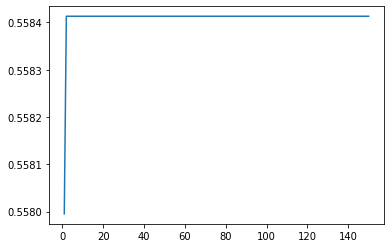

In [146]:
plt.plot(range(1, 151), modelcathistory.history['accuracy'])

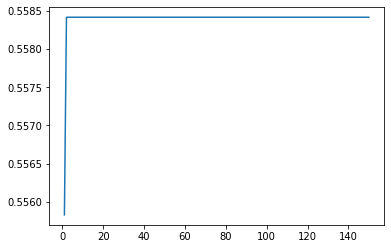

In [147]:
plt.plot(range(1, 151), modelhistory.history['accuracy'])

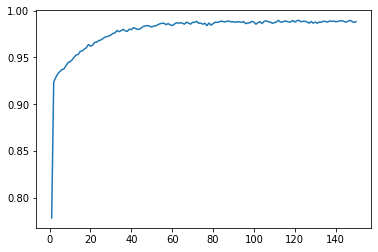

In [137]:
plt.plot(range(1, 151), model1history.history['accuracy'])

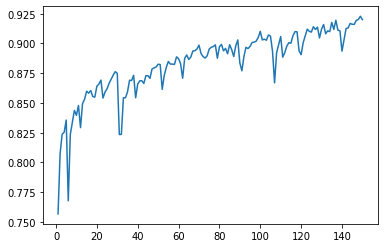

In [138]:
plt.plot(range(1, 151), model2history.history['accuracy']) #modelcnv2'nin plotu

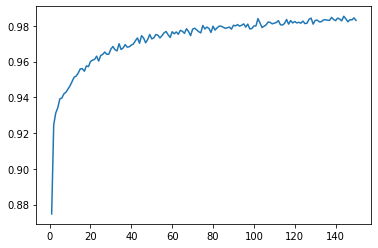

In [139]:
plt.plot(range(1, 151), model3history.history['accuracy'])

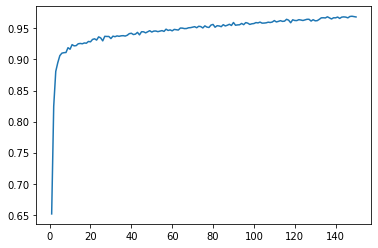

In [141]:
plt.plot(range(1, 151), model4hist.history['accuracy'])

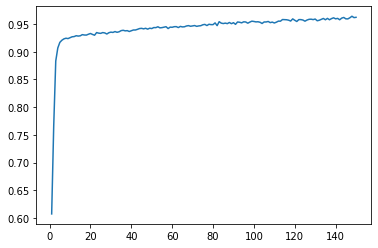

In [142]:
plt.plot(range(1, 151), model5history.history['accuracy'])

In [ ]:
acc = [svcacc, lsvcacc, knnacc, dtreeacc, gnbacc, bnbacc, forestacc, 0.92, 0.9621, 0.9685, 0.9831, 0.9319, 0.9881, 0.9884, 0.5584]
f1 = [svcf1, lsvcf1, knnf1, dtreef1, gnbf1, bnbf1, forestf1, modelcnv2f1, model5f1, model4f1, model3f1, model2f1, model1f1, modelf1, modelcatf1]
precision = [svcprecision, lsvcprecision, knnprecision, dtreeprecision, gnbprecision, bnbprecision, forestprecision, modelcnv2precision, model5precision, model4precision, model3precision, model2precision, model1precision, modelprecision, modelcatprecision]
recall = [svcrecall, lsvcrecall, knnrecall, dtreerecall, gngbrecall, bnbrecall, forestrecall, modelcnv2recall, model5recall, model4recall, model3recall, model2recall, model1recall, modelrecall, modelcatrecall]

In [54]:
#RNN GRU SİMPLERNN MODEL5,RNN SİMPLERNN*2 MODEL4,RNN LSTM-DRP-LSTM-DRP MODEL3,CNN1 MODEL2,RNN MODEL1 LSTM LSTM DNS DNSE,MODELCAT CATEGO,MODEL DNN
model_names = ['SVC', 'LSVC', 'KNN', 'DTree', 'GNB', 'BNB', 'ForestTree', 'CNN2', 'RNN4', 'RNN3', 'RNN2', 'CNN1', 'RNN1', 'DNN', 'DNN-cat']

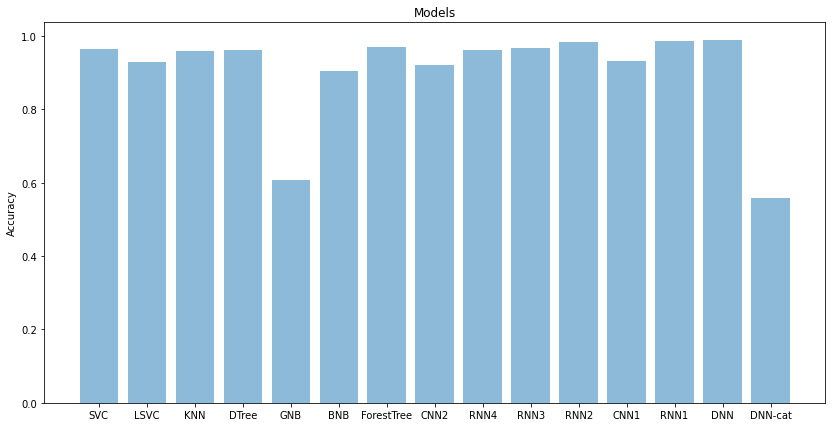

In [29]:
plt.figure(figsize=(14, 7))

plt.bar(np.arange(len(acc)), acc, align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('Accuracy')
plt.title('Models')
plt.show()

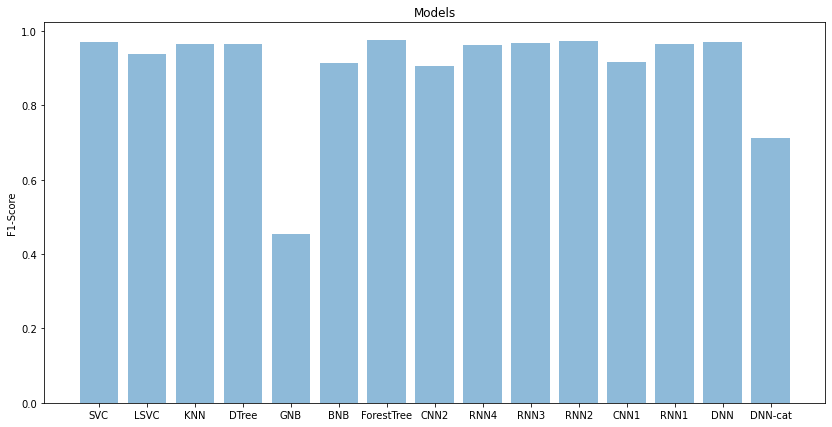

In [30]:
plt.figure(figsize=(14, 7))

plt.bar(np.arange(len(f1)), f1, align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('F1-Score')
plt.title('Models')
plt.show()

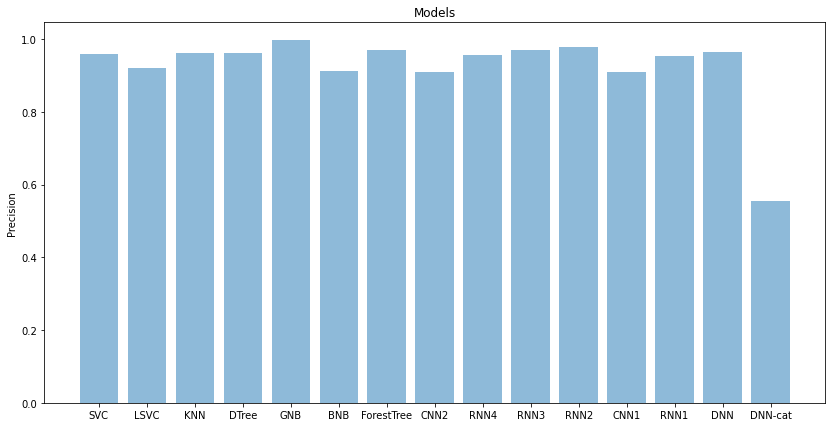

In [31]:
plt.figure(figsize=(14, 7))

plt.bar(np.arange(len(precision)), precision, align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('Precision')
plt.title('Models')
plt.show()

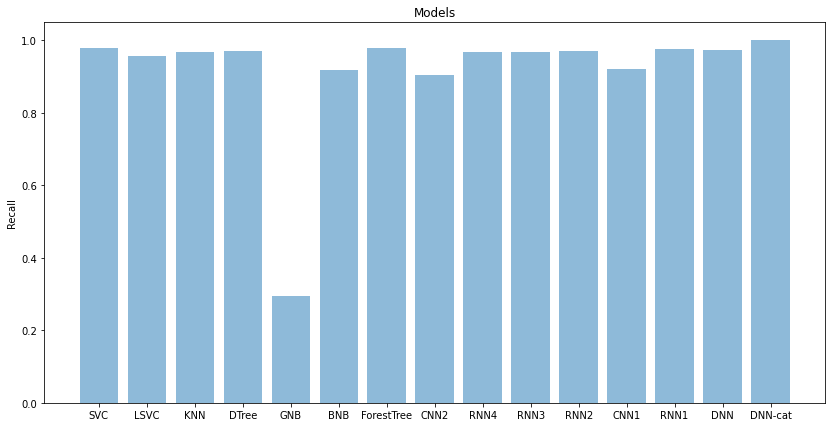

In [32]:
plt.figure(figsize=(14, 7))

plt.bar(np.arange(len(recall)), recall, align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('Recall')
plt.title('Models')
plt.show()

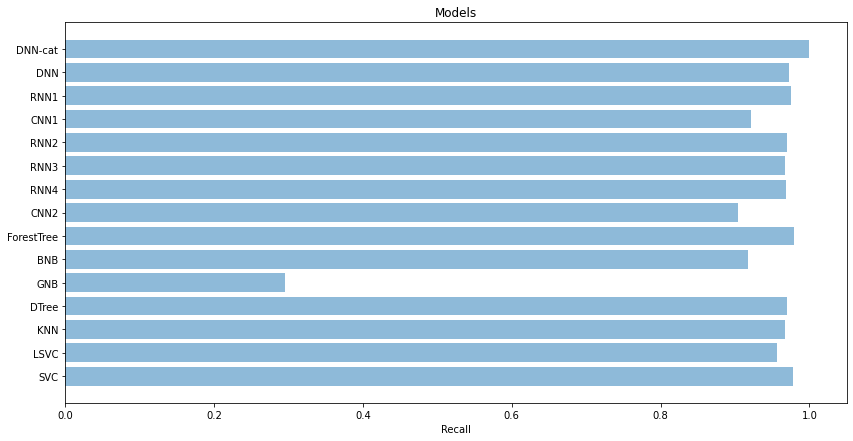

In [35]:
plt.figure(figsize=(14, 7))

plt.barh(np.arange(len(recall)), recall, align='center', alpha=0.5)
plt.yticks(np.arange(len(model_names)), model_names)
plt.xlabel('Recall')
plt.title('Models')
plt.show()

Only Deep Learning

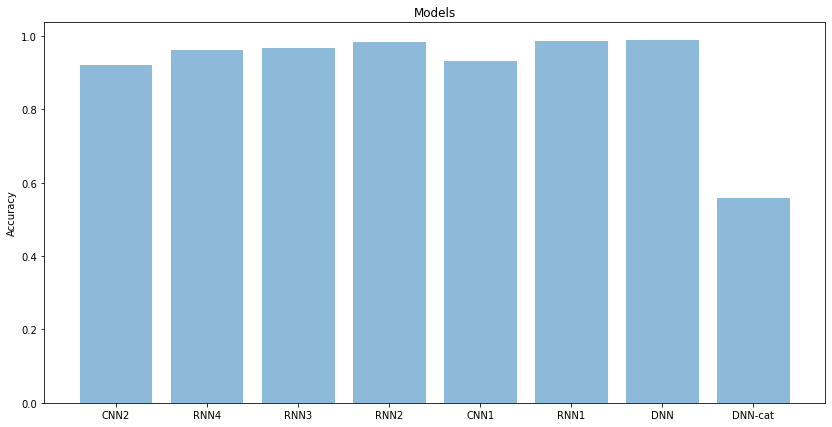

In [46]:
plt.figure(figsize=(14, 7))

plt.bar(np.arange(len(acc[7:])), acc[7:], align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names[7:])), model_names[7:])
plt.ylabel('Accuracy')
plt.title('Models')
plt.show()

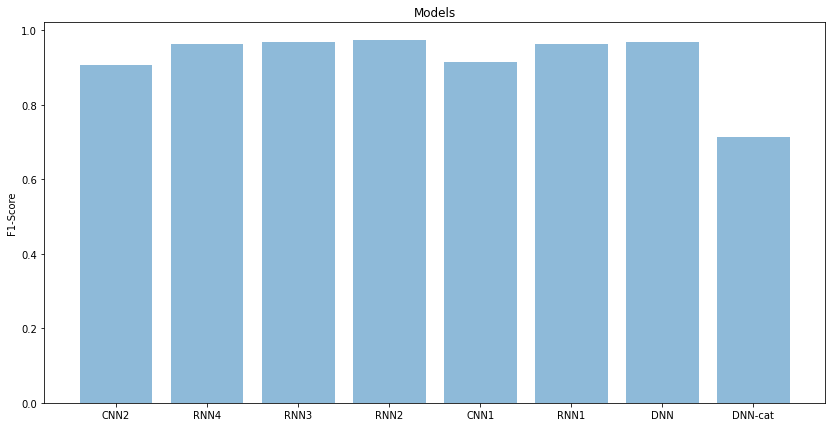

In [47]:
plt.figure(figsize=(14, 7))

plt.bar(np.arange(len(f1[7:])), f1[7:], align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names[7:])), model_names[7:])
plt.ylabel('F1-Score')
plt.title('Models')
plt.show()

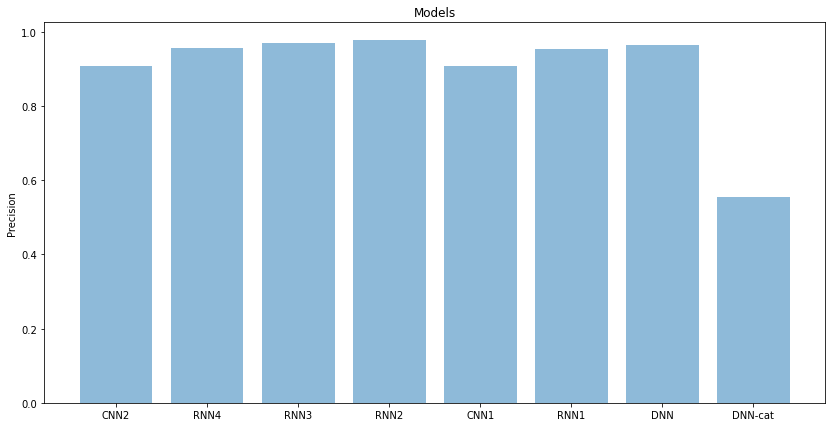

In [48]:
plt.figure(figsize=(14, 7))

plt.bar(np.arange(len(precision[7:])), precision[7:], align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names[7:])), model_names[7:])
plt.ylabel('Precision')
plt.title('Models')
plt.show()

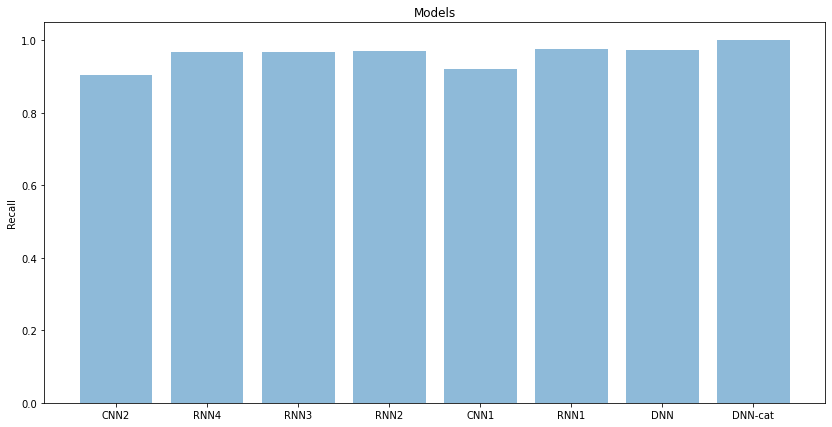

In [49]:
plt.figure(figsize=(14, 7))

plt.bar(np.arange(len(recall[7:])), recall[7:], align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names[7:])), model_names[7:])
plt.ylabel('Recall')
plt.title('Models')
plt.show()

dnn1 - 64-128-128-64-1 - sigmoid - adamax - huber - 150 epoch - 98.84 - 96.53

modelcat - dnncat - 64-128-64-1 - sigmoid - bcross - sgd - 150 epoch - 55.84 - 55.35

model1 - lstm64-lstm128-128-64-drop0.2-1 tanh - bcross - adamax - 150epoch - 98.81 - 95.99

model2 - cnv64(1,1)-maxpoll(2,2)-cnv128-cnv128-drop0.2-flat-128-128-drop0.2-1 - tanh - huber - adamax  - 93.19 - 90.59

model3 - lstm128-drop0.2-lstm256-drop0.2-250-1- sigmoid - bcross-adamx-150 - 98.31 - 97.20

model4 - simplernn64-drop0.2-simplernn128-drop0.2-128-128-1- sigmoid-bcross-sgd - 96.85 - 96.47

model5 - gru-drop0.2-simplernn128-drop0.2-128-128-1- sigmoid-bcross-sgd 96.21 - 95.90

cnn2 - cnv64-maxpool2,2-cnv128-cnv128-drop0.2-flat-128-1- tanh - bcross - adam - 92.00 - 89.63

Machine Learning

#svm "kernel: polynomial, C: 5, degree: 6, gamma: scale, DFS: ovo   98.10%
96.53

#linear svm "losses: hinge, penalty: L2, C: 1, multi class: ovr" and this combination has an accuracy of 93.19%
92.94

#K: 5, weights: distance, algorithm: auto, metric: manhattan" and this combination has an accuracy of 98.52%   0.3 test
96.02

#dtree max features: none, criterion: entropy, splitter: random" and this  combination has an accuracy of 96.92%   .15 test   dtree
96.17

#20%. We got 60.89%  as the accuracy value  gnaive b
60.89

#bnb "alpha: 0, binarize: 0, fit prior: true" and this combination has an accuracy of 90.95%. T  0.2 test  bnaiveba
90.50

#forest "max features: auto, criterion: entropy, class weight: none, warm start: false" and this combination has an accuracy of 97.34%.   0.15  randomfo
97.13

(('svc', 1196, 0.9837192474674384),
 ('lsvc', 10, 0.9397227245328511),
 ('knn', 657, 0.9891461649782923),
 ('bnb', 1, 0.918625678119349),
 ('random', 108, 0.9909551374819102),
 ('dtree', 81, 0.9876989869753979))


[0.9852700490998364, 0.9470899470899471, 0.9901510177281682, 0.9888010540184453, 0.45441283734500365, 0.9267498643516007, 0.9917898193760263]
[0.9798177083333334, 0.9303534303534303, 0.9875573018991487, 0.989452867501648, 0.9983974358974359, 0.9333333333333333, 0.9895150720838795]
[0.9907834101382489, 0.9644396551724138, 0.9927583936800527, 0.9881500987491771, 0.29414542020774315, 0.9202586206896551, 0.9940750493745886]

svc lsvc knn dtree gnb bnb random

In [1]:
acc = [0.9837192474674384, 0.9397227245328511, 0.9891461649782923, 0.9876989869753979, 0.6134366925064599, 0.918625678119349, 0.9909551374819102, 0.92, 0.9621, 0.9685, 0.9831, 0.9319, 0.9881, 0.9884, 0.5584, 0.9002,0.9629,0.9626,]

In [2]:
f1 = [0.9852700490998364, 0.9470899470899471, 0.9901510177281682, 0.9888010540184453, 0.45441283734500365, 0.9267498643516007, 0.9917898193760263, 0.9061135371179039, 0.9631835408770979, 0.9681112019623876, 0.9732094040459268, 0.9156300703082748, 0.9642184557438794, 0.9688262401734887, 0.7125946050844169,0.9087,0.9661,0.9656]
precision = [0.9798177083333334, 0.9303534303534303, 0.9875573018991487, 0.989452867501648, 0.9983974358974359, 0.9333333333333333, 0.9895150720838795, 0.9080962800875274, 0.957481162540366, 0.9689034369885434, 0.9769484083424808, 0.9092373791621912, 0.9526847421584264, 0.9643820831084727, 0.553512209828158,0.9025,0.9579,0.9635]
recall = [0.9907834101382489, 0.9644396551724138, 0.9927583936800527, 0.9881500987491771, 0.29414542020774315, 0.9202586206896551, 0.9940750493745886, 0.9041394335511983, 0.9689542483660131, 0.9673202614379085, 0.9694989106753813, 0.9221132897603486, 0.9760348583877996, 0.9733115468409586, 1.0,0.9150,0.9744,0.9678]

In [ ]:
dnn1 – (64-128-128-64-1) - sigmoid - adamax - huber - 150 epoch - 98.84 - 96.53 Figure 3.15
modelcat - dnncat – (64-128-64-1) - sigmoid - bcross - sgd  - 55.84 - 55.35 -- Figure 3.14 – categorical
model1 –( lstm64-lstm128-128-64-drop0.2-1) tanh - bcross - adamax - 98.81 - 95.99  - Figure 3.16 
model2 – (cnv64(1,1)-maxpoll(2,2)-cnv128-cnv128-drop0.2-flat-128-128-drop0.2-1) - tanh - huber - adamax  - 93.19 - 90.59 - Figure 3.20 
model3 – (lstm128-drop0.2-lstm256-drop0.2-250-1)- sigmoid - bcross-adamx-150 - 98.31 - 97.20 - Figure 3.17 
model4 – (simplernn64-drop0.2-simplernn128-drop0.2-128-128-1)- sigmoid-bcross-sgd - 96.85 - 96.47 - Figure 3.18: 
model5 – (gru-drop0.2-simplernn128-drop0.2-128-128-1)- sigmoid-bcross-sgd 96.21 - 95.90 - Figure 3.19 
cnn2 – (cnv64-maxpool2,2-cnv128-cnv128-drop0.2-flat-128-1)- tanh - bcross - adam - 92.00 - 89.63 - Figure 3.21: 


In [3]:
model_names = ['SVC', 'LSVC', 'KNN', 'DTree', 'GNB', 'BNB', 'RandomForest', 'CNN Model 2', 'RNN Model 4', 'RNN Model 3', 'RNN Model 2', 'CNN Model 1', 'RNN Model 1', 'DNN Model 2', 'DNN Model 1', 'CombinedModel 1','CombinedModel 2', 'CombinedModel 3']

In [5]:
#rnnmodel2, randomforest, combined3
#     10           6,         -1


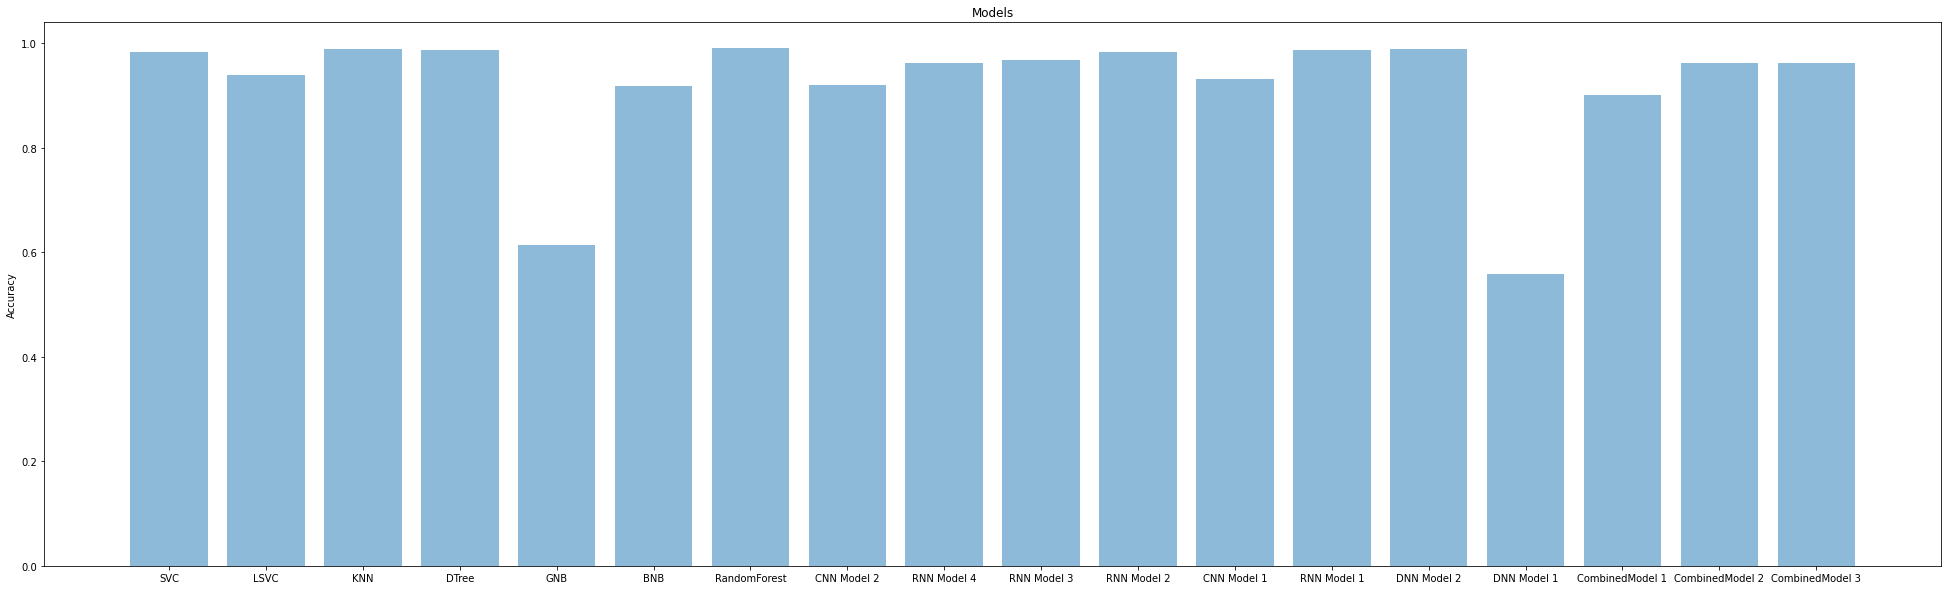

In [15]:
plt.figure(figsize=(34, 10))

plt.bar(np.arange(len(acc)), acc, align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('Accuracy')
plt.title('Models')
plt.show()

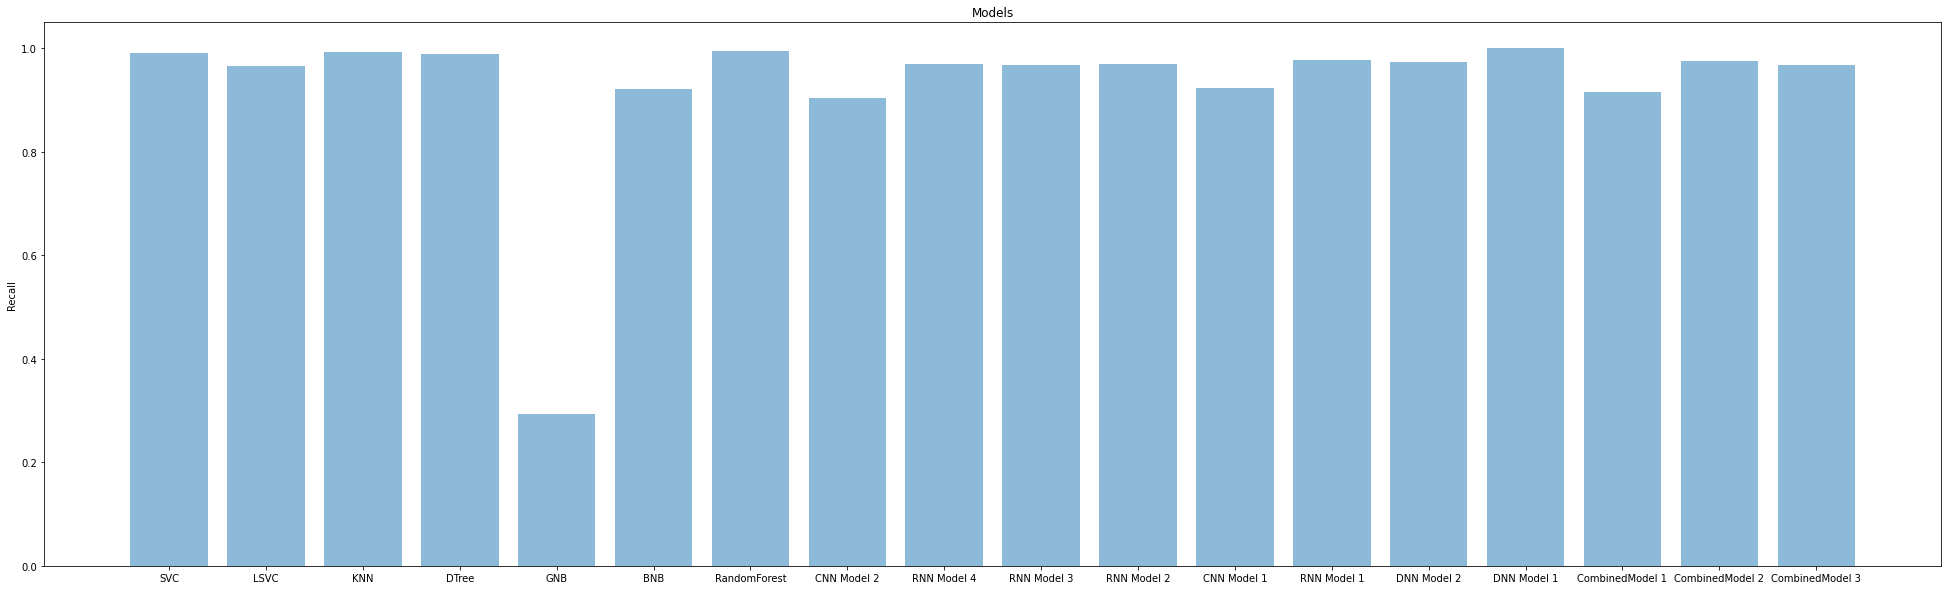

In [16]:
plt.figure(figsize=(34, 10))

plt.bar(np.arange(len(recall)), recall, align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('Recall')
plt.title('Models')
plt.show()

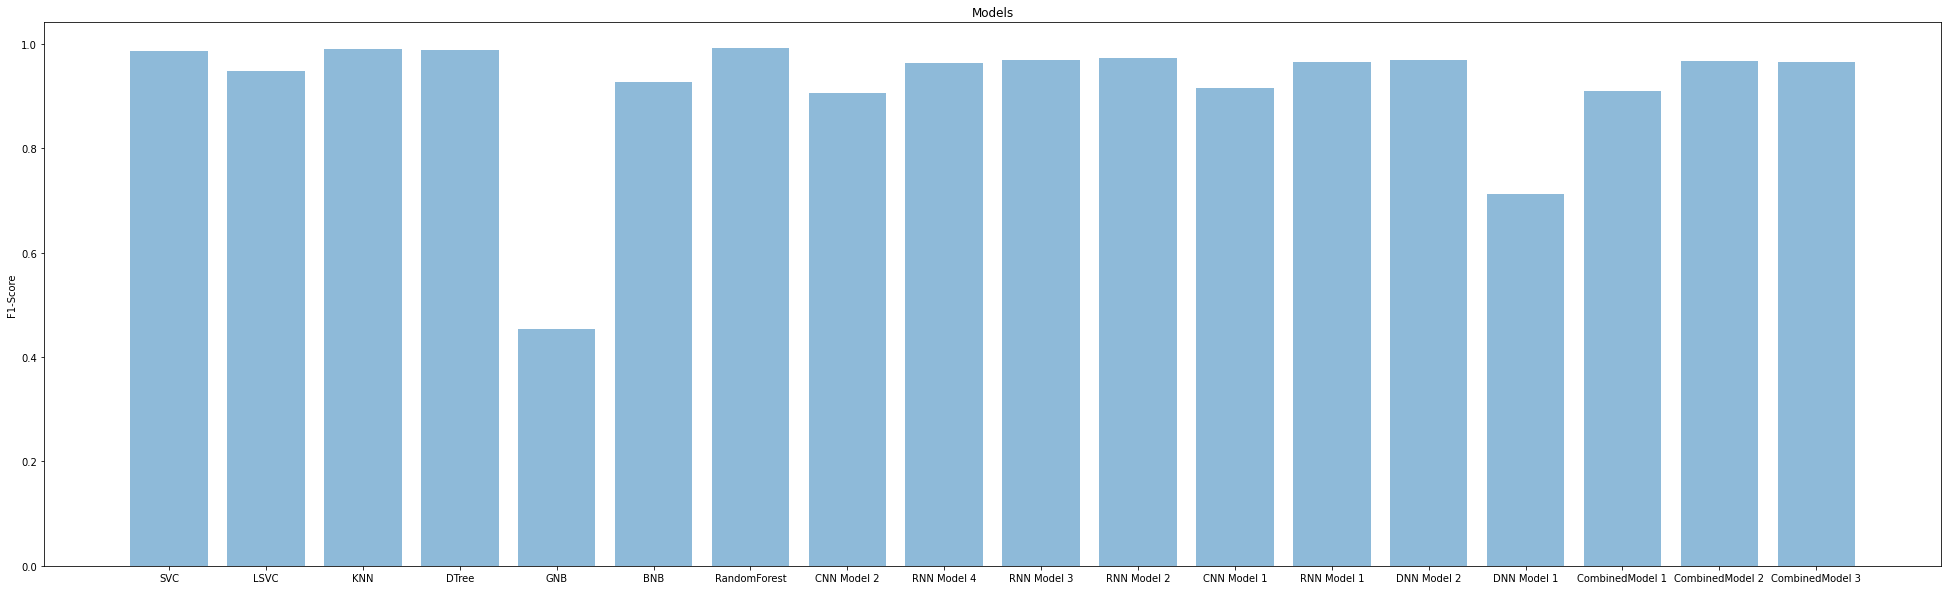

In [17]:
plt.figure(figsize=(34, 10))

plt.bar(np.arange(len(f1)), f1, align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('F1-Score')
plt.title('Models')
plt.show()

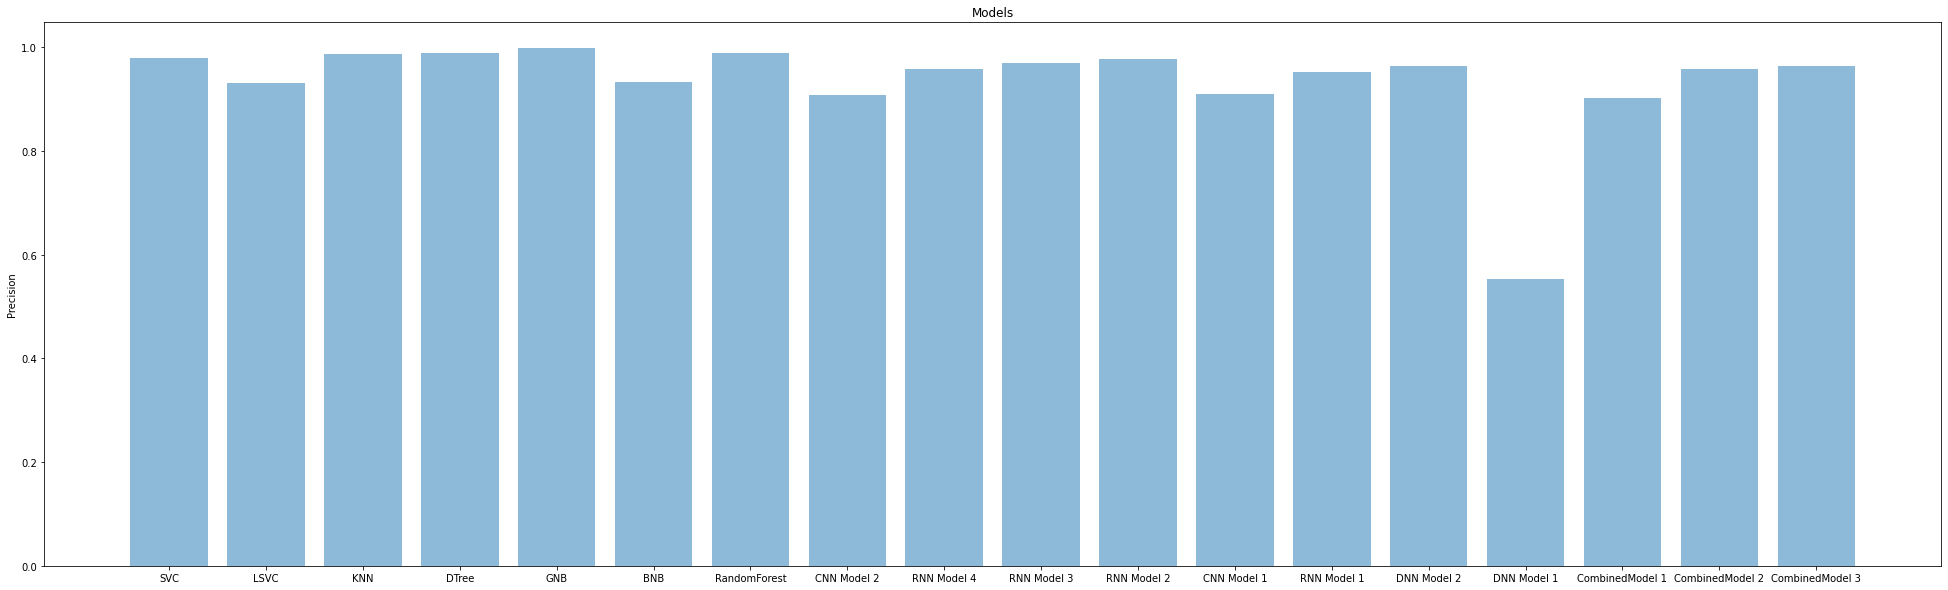

In [18]:
plt.figure(figsize=(34, 10))

plt.bar(np.arange(len(precision)), precision, align='center', alpha=0.5)
plt.xticks(np.arange(len(model_names)), model_names)
plt.ylabel('Precision')
plt.title('Models')
plt.show()

In [24]:
model1 = keras.Sequential()
model1.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model1.add(keras.layers.LSTM(128, activation='relu'))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(64 ,activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Reshape((4,4,4)))
model1.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(4,4,4)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model1.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(1,activation='tanh'))

In [25]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

model1.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model1history = model1.fit(x, y_train, epochs = 150, validation_data=(xx, y_test))

Epoch 1/150
242/242 [==============================] - 4s 15ms/step - loss: 0.5575 - accuracy: 0.7488 - val_loss: 0.2209 - val_accuracy: 0.9207
Epoch 2/150
242/242 [==============================] - 3s 14ms/step - loss: 0.1963 - accuracy: 0.9283 - val_loss: 0.1741 - val_accuracy: 0.9343
Epoch 3/150
242/242 [==============================] - 2s 9ms/step - loss: 0.1792 - accuracy: 0.9333 - val_loss: 0.1695 - val_accuracy: 0.9319
Epoch 4/150
242/242 [==============================] - 2s 9ms/step - loss: 0.1596 - accuracy: 0.9384 - val_loss: 0.1582 - val_accuracy: 0.9382
Epoch 5/150
242/242 [==============================] - 2s 10ms/step - loss: 0.1518 - accuracy: 0.9415 - val_loss: 0.1471 - val_accuracy: 0.9427
Epoch 6/150
242/242 [==============================] - 2s 10ms/step - loss: 0.1420 - accuracy: 0.9444 - val_loss: 0.1436 - val_accuracy: 0.9421
Epoch 7/150
242/242 [==============================] - 3s 13ms/step - loss: 0.1313 - accuracy: 0.9464 - val_loss: 0.1419 - val_accuracy: 0

[[1379  102]
 [  23 1813]]
accuracy :  0.962315345191438
f1 :  0.9666755531858172
precision :  0.9467362924281985
recall :  0.9874727668845316
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1481
           1       0.95      0.99      0.97      1836

    accuracy                           0.96      3317
   macro avg       0.97      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



<AxesSubplot:>

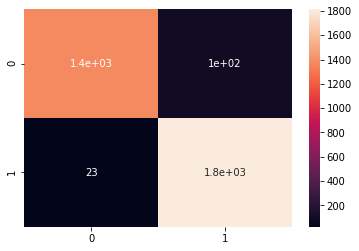

In [39]:
model1_pred = model1.predict(xx)
model_pred = []
for i in range(len(y_test)):
    if model1_pred[i][0] < 0:
        model_pred.append(0)
    else:
        model_pred.append(1)
cm_model1 = confusion_matrix(y_test, model_pred)
print(cm_model1)
print("accuracy : ", str(accuracy_score(y_test, model_pred)))
print("f1 : ", str(f1_score(y_test, model_pred)))
print("precision : ", str(precision_score(y_test, model_pred)))
print("recall : ", str(recall_score(y_test, model_pred)))
print(str(classification_report(y_test, model_pred)))
sns.heatmap(cm_model1, annot=True)

In [44]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model1.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Reshape((8,16)))
model1.add(keras.layers.LSTM(64, activation='relu',return_sequences=True))
model1.add(keras.layers.LSTM(128, activation='relu'))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(64 ,activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(1,activation='tanh'))

In [45]:
x = x_train.reshape((x_train.shape[0], 2, 5, 3))
xt = x_test.reshape((x_test.shape[0], 2, 5, 3))
model1.compile(loss=loss_fn, optimizer='adamax', metrics=['accuracy'])
model1history = model1.fit(x, y_train, epochs = 150, validation_data=(xt, y_test))

Epoch 1/150
242/242 [==============================] - 4s 18ms/step - loss: 0.1007 - accuracy: 0.6913 - val_loss: 0.0681 - val_accuracy: 0.8004
Epoch 2/150
242/242 [==============================] - 3s 13ms/step - loss: 0.0668 - accuracy: 0.8105 - val_loss: 0.0612 - val_accuracy: 0.8212
Epoch 3/150
242/242 [==============================] - 3s 13ms/step - loss: 0.0597 - accuracy: 0.8288 - val_loss: 0.0573 - val_accuracy: 0.8378
Epoch 4/150
242/242 [==============================] - 3s 13ms/step - loss: 0.0577 - accuracy: 0.8382 - val_loss: 0.0556 - val_accuracy: 0.8456
Epoch 5/150
242/242 [==============================] - 3s 13ms/step - loss: 0.0550 - accuracy: 0.8506 - val_loss: 0.0523 - val_accuracy: 0.8505
Epoch 6/150
242/242 [==============================] - 3s 13ms/step - loss: 0.0532 - accuracy: 0.8551 - val_loss: 0.0533 - val_accuracy: 0.8481
Epoch 7/150
242/242 [==============================] - 3s 13ms/step - loss: 0.0524 - accuracy: 0.8544 - val_loss: 0.0558 - val_accuracy:

[[1328  153]
 [ 179 1657]]
accuracy :  0.8999095568284594
f1 :  0.9089413055403182
precision :  0.9154696132596685
recall :  0.9025054466230937
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1481
           1       0.92      0.90      0.91      1836

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



<AxesSubplot:>

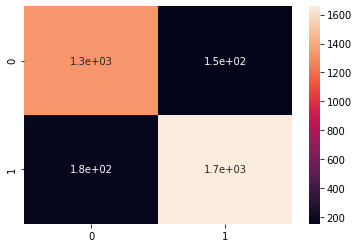

In [48]:
model1_pred = model1.predict(xt)
model_pred = []
for i in range(len(y_test)):
    if model1_pred[i][0] < 0.5:
        model_pred.append(0)
    else:
        model_pred.append(1)
cm_model1 = confusion_matrix(y_test, model_pred)
print(cm_model1)
print("accuracy : ", str(accuracy_score(y_test, model_pred)))
print("f1 : ", str(f1_score(y_test, model_pred)))
print("precision : ", str(precision_score(y_test, model_pred)))
print("recall : ", str(recall_score(y_test, model_pred)))
print(str(classification_report(y_test, model_pred)))
sns.heatmap(cm_model1, annot=True)

In [50]:
model1 = keras.Sequential()
model1.add(keras.layers.LSTM(128, activation='relu',return_sequences=True, input_shape=(1,30)))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.LSTM(256, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(250,activation='relu'))
model1.add(keras.layers.Reshape((5,10,5)))
model1.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(5,10,5)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model1.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(1,activation='tanh'))

In [51]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))
model1.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model1history = model1.fit(x, y_train, epochs = 150, validation_data=(xx, y_test))

Epoch 1/150
242/242 [==============================] - 7s 30ms/step - loss: 0.5429 - accuracy: 0.7315 - val_loss: 0.2035 - val_accuracy: 0.9216
Epoch 2/150
242/242 [==============================] - 7s 28ms/step - loss: 0.2074 - accuracy: 0.9203 - val_loss: 0.1845 - val_accuracy: 0.9264
Epoch 3/150
242/242 [==============================] - 7s 28ms/step - loss: 0.1838 - accuracy: 0.9302 - val_loss: 0.1721 - val_accuracy: 0.9319
Epoch 4/150
242/242 [==============================] - 7s 28ms/step - loss: 0.1746 - accuracy: 0.9293 - val_loss: 0.1541 - val_accuracy: 0.9370
Epoch 5/150
242/242 [==============================] - 7s 28ms/step - loss: 0.1670 - accuracy: 0.9346 - val_loss: 0.1486 - val_accuracy: 0.9403
Epoch 6/150
242/242 [==============================] - 6s 27ms/step - loss: 0.1508 - accuracy: 0.9389 - val_loss: 0.1473 - val_accuracy: 0.9421
Epoch 7/150
242/242 [==============================] - 7s 29ms/step - loss: 0.1457 - accuracy: 0.9413 - val_loss: 0.1469 - val_accuracy:

[[1431   50]
 [  53 1783]]
accuracy :  0.968947844437745
f1 :  0.9719269555737259
precision :  0.9727223131478451
recall :  0.9711328976034859
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1481
           1       0.97      0.97      0.97      1836

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



<AxesSubplot:>

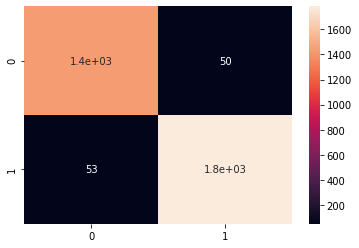

In [53]:
model1_pred = model1.predict(xx)
model_pred = []
for i in range(len(y_test)):
    if model1_pred[i][0] < 0.5:
        model_pred.append(0)
    else:
        model_pred.append(1)
cm_model1 = confusion_matrix(y_test, model_pred)
print(cm_model1)
print("accuracy : ", str(accuracy_score(y_test, model_pred)))
print("f1 : ", str(f1_score(y_test, model_pred)))
print("precision : ", str(precision_score(y_test, model_pred)))
print("recall : ", str(recall_score(y_test, model_pred)))
print(str(classification_report(y_test, model_pred)))
sns.heatmap(cm_model1, annot=True)

In [54]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(64,(1,1), activation='relu',input_shape=(2,5,3)))
model1.add(keras.layers.MaxPool2D(2,2))
model1.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model1.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Reshape((8,16)))
model1.add(keras.layers.GRU(64, return_sequences=True, input_shape=(8,16)))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.SimpleRNN(128, activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dense(128,activation='relu'))
model1.add(keras.layers.Dense(1,activation='sigmoid'))

In [55]:
x = x_train.reshape((x_train.shape[0], 2, 5, 3))
xt = x_test.reshape((x_test.shape[0], 2, 5, 3))
model1.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model1history = model1.fit(x, y_train, epochs = 150, validation_data=(xt, y_test))

Epoch 1/150
242/242 [==============================] - 5s 22ms/step - loss: 0.5151 - accuracy: 0.7471 - val_loss: 0.4246 - val_accuracy: 0.7992
Epoch 2/150
242/242 [==============================] - 4s 15ms/step - loss: 0.4197 - accuracy: 0.8115 - val_loss: 0.3880 - val_accuracy: 0.8260
Epoch 3/150
242/242 [==============================] - 5s 19ms/step - loss: 0.3769 - accuracy: 0.8325 - val_loss: 0.3692 - val_accuracy: 0.8279
Epoch 4/150
242/242 [==============================] - 3s 12ms/step - loss: 0.3623 - accuracy: 0.8429 - val_loss: 0.3458 - val_accuracy: 0.8432
Epoch 5/150
242/242 [==============================] - 3s 12ms/step - loss: 0.3480 - accuracy: 0.8500 - val_loss: 0.3484 - val_accuracy: 0.8411
Epoch 6/150
242/242 [==============================] - 3s 11ms/step - loss: 0.3373 - accuracy: 0.8547 - val_loss: 0.3326 - val_accuracy: 0.8547
Epoch 7/150
242/242 [==============================] - 3s 11ms/step - loss: 0.3322 - accuracy: 0.8545 - val_loss: 0.3288 - val_accuracy:

[[1336  145]
 [ 187 1649]]
accuracy :  0.8999095568284594
f1 :  0.9085399449035813
precision :  0.9191750278706801
recall :  0.8981481481481481
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1481
           1       0.92      0.90      0.91      1836

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



<AxesSubplot:>

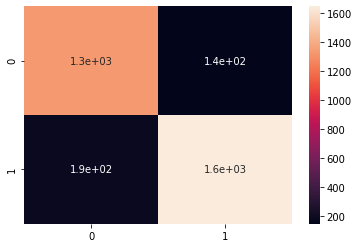

In [57]:
model1_pred = model1.predict(xt)
model_pred = []
for i in range(len(y_test)):
    if model1_pred[i][0] < 0.5:
        model_pred.append(0)
    else:
        model_pred.append(1)
cm_model1 = confusion_matrix(y_test, model_pred)
print(cm_model1)
print("accuracy : ", str(accuracy_score(y_test, model_pred)))
print("f1 : ", str(f1_score(y_test, model_pred)))
print("precision : ", str(precision_score(y_test, model_pred)))
print("recall : ", str(recall_score(y_test, model_pred)))
print(str(classification_report(y_test, model_pred)))
sns.heatmap(cm_model1, annot=True)

In [64]:
model3 = keras.Sequential()
model3.add(keras.layers.LSTM(128, activation='relu',return_sequences=True, input_shape=(1,30)))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.LSTM(256, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(250,activation='relu'))
model3.add(keras.layers.Reshape((25,10)))
model3.add(keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(25,10)))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.SimpleRNN(128, activation='relu'))
model3.add(keras.layers.Dropout(0.2))
model3.add(keras.layers.Dense(128,activation='relu'))
model3.add(keras.layers.Dense(128,activation='relu'))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [66]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))
model3.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model3history = model3.fit(x, y_train, epochs = 150, validation_data=(xx, y_test))

Epoch 1/150
242/242 [==============================] - 7s 28ms/step - loss: 0.3892 - accuracy: 0.8270 - val_loss: 0.2032 - val_accuracy: 0.9273
Epoch 2/150
242/242 [==============================] - 6s 26ms/step - loss: 0.2041 - accuracy: 0.9249 - val_loss: 0.1711 - val_accuracy: 0.9322
Epoch 3/150
242/242 [==============================] - 5s 23ms/step - loss: 0.1859 - accuracy: 0.9280 - val_loss: 0.1639 - val_accuracy: 0.9367
Epoch 4/150
242/242 [==============================] - 5s 22ms/step - loss: 0.1704 - accuracy: 0.9303 - val_loss: 0.1609 - val_accuracy: 0.9352
Epoch 5/150
242/242 [==============================] - 7s 29ms/step - loss: 0.1567 - accuracy: 0.9365 - val_loss: 0.1500 - val_accuracy: 0.9403
Epoch 6/150
242/242 [==============================] - 9s 37ms/step - loss: 0.1481 - accuracy: 0.9387 - val_loss: 0.1478 - val_accuracy: 0.9376
Epoch 7/150
242/242 [==============================] - 7s 30ms/step - loss: 0.1431 - accuracy: 0.9415 - val_loss: 0.1481 - val_accuracy:

[[1412   69]
 [  31 1805]]
accuracy :  0.9698522761531504
f1 :  0.973045822102426
precision :  0.9631803628601922
recall :  0.9831154684095861
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1481
           1       0.96      0.98      0.97      1836

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



<AxesSubplot:>

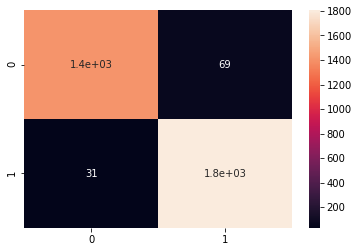

In [68]:
model1_pred = model3.predict(xx)
model_pred = []
for i in range(len(y_test)):
    if model1_pred[i][0] < 0.5:
        model_pred.append(0)
    else:
        model_pred.append(1)
cm_model1 = confusion_matrix(y_test, model_pred)
print(cm_model1)
print("accuracy : ", str(accuracy_score(y_test, model_pred)))
print("f1 : ", str(f1_score(y_test, model_pred)))
print("precision : ", str(precision_score(y_test, model_pred)))
print("recall : ", str(recall_score(y_test, model_pred)))
print(str(classification_report(y_test, model_pred)))
sns.heatmap(cm_model1, annot=True)

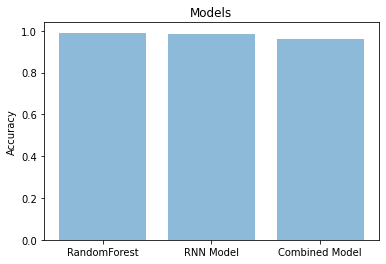

In [17]:

plt.bar(np.arange(3), [acc[6], acc[10], acc[-1]], align='center', alpha=0.5)
plt.xticks(np.arange(3), [model_names[6], 'RNN Model', 'Combined Model'])
plt.ylabel('Accuracy')
plt.title('Models')
plt.show()

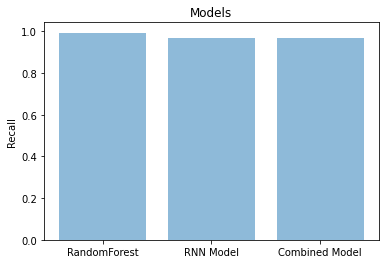

In [18]:

plt.bar(np.arange(3), [recall[6], recall[10], recall[-1]], align='center', alpha=0.5)
plt.xticks(np.arange(3), [model_names[6], 'RNN Model', 'Combined Model'])
plt.ylabel('Recall')
plt.title('Models')
plt.show()

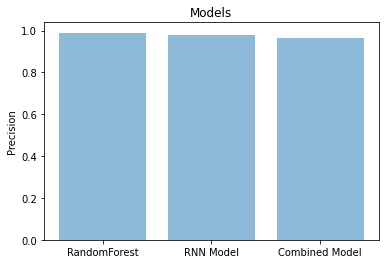

In [19]:

plt.bar(np.arange(3), [precision[6], precision[10], precision[-1]], align='center', alpha=0.5)
plt.xticks(np.arange(3), [model_names[6], 'RNN Model', 'Combined Model'])
plt.ylabel('Precision')
plt.title('Models')
plt.show()

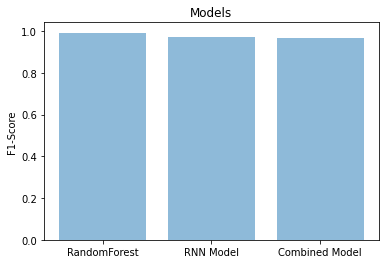

In [20]:
#plt.figure(figsize=(34, 10))

plt.bar(np.arange(3), [f1[6], f1[10], f1[-1]], align='center', alpha=0.5)
plt.xticks(np.arange(3), [model_names[6], 'RNN Model', 'Combined Model'])
plt.ylabel('F1-Score')
plt.title('Models')
plt.show()